# Content

In this notebook we show the single-trace key recovery from the paper on a single trace.
We use trace processing techniques that are detailed in the other notebooks so that we only focus here on the attack itself.

# Imports and Globals

Here are the python packages that must be available to run the script.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tools import *

Below are the global path variables where are stored curves and pre-computed data (from other notebooks).
Please adapt to your personnal installation.

In [2]:
# adapt here the pathes to your configuration
curve_directory = '../data'
tmp_directory = './tmp'
curve_filename  = '20_traces.npy'
curve_idx = 0 # change here to select another curve

# Trace Pre-processing

We now load a trace and perform the pre-processing steps based on techniques explained in other notebooks.

In [3]:
curve = np.load(os.path.join(curve_directory,curve_filename))[curve_idx]

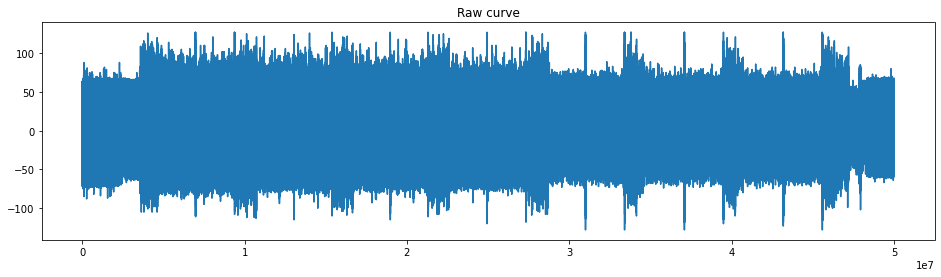

In [4]:
fig, ax = plt.subplots(1,1,figsize=[16,4])
ax.plot(curve)
ax.set_title("Raw curve")
plt.show()

The first step is to detect the 7 outer iterations.

> **IMPORTANT** You must have run the 'Outer-Iterations Detection' notebook before executing the following cells since it creates the pattern used for detecting iterations.

In [5]:
%%time
pattern = np.load(os.path.join(tmp_directory,'outer_iteration_pattern.npy'))
sos=butter(4, 0.01, output='sos')
preproc_pattern = simplify_pattern(pattern,decimation=256,sos=sos)
preproc_curve = simplify_pattern(curve,decimation=256,sos=sos)
pcc = pearson_xcorr(preproc_curve,preproc_pattern)
# we remove last peak which corresponds to the end of the last outer-iteration
outer_starts = detect_peaks(pcc, threshold=0.85, min_gap=2500, keep_last=True)[:-1]
print(outer_starts)

[17944, 41742, 64895, 88054, 111850, 133201, 157000]
CPU times: user 19.9 s, sys: 943 ms, total: 20.8 s
Wall time: 20.8 s
